In [1]:
## importing libraries
!pip install matplotlib
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
#load the dataset
df = pd.read_csv('dataset.csv')

In [3]:
#cleaning the dataset
df.columns

Index(['Date', 'crime_rate', 'renovation_level', 'Year', 'Address',
       'num_rooms', 'Property', 'amenities_rating', 'carpet_area',
       'nearby_restaurants', 'public_transport_availability',
       'property_tax_rate', 'distance_to_school', 'Locality', 'Residential',
       'Estimated Value', 'Sale Price', 'specifications'],
      dtype='object')

In [4]:
df['Residential'].unique() ##Target Encoding

array(['Condominium', 'Detached House', 'Triplex', 'Duplex', 'Fourplex'],
      dtype=object)

In [5]:
df['renovation_level'].unique() ##label encoding

array(['Minor', 'Basic', 'Extensive', 'Limited', 'Essential', 'Standard',
       'Advanced', 'Partial', 'Complete', 'Premium'], dtype=object)

In [6]:
df['Property'].unique() ##target encoding

array(['Condo', 'Single Family', 'Three Family', 'Two Family',
       'Four Family'], dtype=object)

In [7]:
df['amenities_rating'].unique() ##label encoding

array(['Mediocre', 'Superb', 'Satisfactory', 'Outstanding', 'Luxurious',
       'Marginal', 'Below Average', 'Unimpressive', 'Exceptional',
       'Commonplace'], dtype=object)

In [8]:
df['public_transport_availability'].unique() ##label encoding

array(['Scattered', 'Extensive', 'Accessible', 'Insufficient', 'Abundant',
       'Well-connected', 'Inadequate', 'Sparse', 'Patchy', 'Limited'],
      dtype=object)

In [9]:
df['Locality'].unique() ##target encoding

array(['Greenwich', 'East Hampton', 'Ridgefield', 'Old Lyme', 'Killingly',
       'Glastonbury', 'Naugatuck', 'Bridgeport', 'Danbury', 'Hamden',
       'Branford', 'Norwalk', 'East Granby', 'Windsor', 'Oxford',
       'Chester', 'Thompson', 'Newington', 'Harwinton', 'Canterbury',
       'West Haven', 'Waterbury', 'Bristol', 'Bloomfield', 'Plainfield',
       'Wallingford', 'Farmington', 'Berlin', 'Ellington', 'Stratford',
       'Woodstock', 'Fairfield', 'New Britain', 'Waterford', 'Redding',
       'Stonington', 'Derby', 'Sprague', 'East Haddam', 'Cromwell',
       'New Milford', 'Southington', 'Wethersfield', 'New London',
       'Windham', 'Trumbull', 'Newtown', 'Winchester', 'Durham', 'Wilton',
       'Middletown', 'Putnam', 'Windsor Locks', 'Preston', 'Suffield',
       'Roxbury', 'South Windsor', 'Granby', 'Marlborough', 'Tolland',
       'Simsbury', 'Avon', 'Essex', 'Darien', 'Madison', 'Sterling',
       'Haddam', 'Somers', 'Cheshire', 'Torrington', 'Rocky Hill',
       'Westpo

In [10]:
##checking null values in dataset
df.isnull().sum

<bound method DataFrame.sum of         Date  crime_rate  renovation_level   Year  Address  num_rooms  \
0      False       False             False  False    False      False   
1      False       False             False  False    False      False   
2      False       False             False  False    False      False   
3      False       False             False  False    False      False   
4      False       False             False  False    False      False   
...      ...         ...               ...    ...      ...        ...   
47693  False       False             False  False    False      False   
47694  False       False             False  False    False      False   
47695  False       False             False  False    False      False   
47696  False       False             False  False    False      False   
47697  False       False             False  False    False      False   

       Property  amenities_rating  carpet_area  nearby_restaurants  \
0         False       

In [11]:
##removing extra spaces in data column
df['Date']=df['Date'].str.strip()

In [12]:
df['Date'].tail()

47693    02-05-2010-00:00:00
47694    2010-05-02-00:00:00
47695    2010-05-02-00:00:00
47696    02-05-2010-00:00:00
47697    02-05-2010-00:00:00
Name: Date, dtype: object

In [13]:
##removing spaces from the date data
df['Data']=df['Date'].str.strip()

In [14]:
##converting all the date data into same data type and removing time from the data
df['Date']= pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')
df['Date']= df['Date'].dt.date

In [15]:
df['Date']

0        2009-02-01
1        2009-02-01
2        2009-02-01
3        2009-02-01
4        2009-02-01
            ...    
47693    2010-05-02
47694    2010-02-05
47695    2010-02-05
47696    2010-05-02
47697    2010-05-02
Name: Date, Length: 47698, dtype: object

In [16]:
## converting date datatype into object to Date
df['Date']= pd.to_datetime(df['Date'])

In [17]:
#convert column too string first, then strip spaces, then replace non-numeric values
df['crime_rate']= df['crime_rate'].astype(str).str.strip().replace(
    ["Not Provided", "not provided", "NOT PROVIDED", "N/A", "-", "Unknown"], np.nan
)
#convvert to float after replacing invalid values
df['crime_rate']= pd.to_numeric(df['crime_rate'], errors='coerce')


#Fill the NaN Values with median
df['crime_rate'].fillna(df['crime_rate'].median(), inplace=True)

                                

/var/folders/z_/1fdndl051_37ldt2mr6h3p000000gn/T/ipykernel_74405/573446680.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['crime_rate'].fillna(df['crime_rate'].median(), inplace=True)


In [18]:
## Extacting month from the Date column
df['Month']=df['Date'].dt.month

In [19]:
##dropping unwanted columns for model building
df.drop(columns=['Date','Address'], axis=1, inplace=True)

In [20]:
correlation= df[['Estimated Value', 'Sale Price']].corr()
print(correlation)

                 Estimated Value  Sale Price
Estimated Value         1.000000    0.448571
Sale Price              0.448571    1.000000


In [21]:
df.columns

Index(['crime_rate', 'renovation_level', 'Year', 'num_rooms', 'Property',
       'amenities_rating', 'carpet_area', 'nearby_restaurants',
       'public_transport_availability', 'property_tax_rate',
       'distance_to_school', 'Locality', 'Residential', 'Estimated Value',
       'Sale Price', 'specifications', 'Data', 'Month'],
      dtype='object')

In [22]:
##Dropping Date, specifications
df.drop(columns=['specifications'],inplace=True)

In [23]:
df['amenities_rating'].unique()

array(['Mediocre', 'Superb', 'Satisfactory', 'Outstanding', 'Luxurious',
       'Marginal', 'Below Average', 'Unimpressive', 'Exceptional',
       'Commonplace'], dtype=object)

In [24]:
df['public_transport_availability'].unique()

array(['Scattered', 'Extensive', 'Accessible', 'Insufficient', 'Abundant',
       'Well-connected', 'Inadequate', 'Sparse', 'Patchy', 'Limited'],
      dtype=object)

In [25]:
df['Residential'].unique()

array(['Condominium', 'Detached House', 'Triplex', 'Duplex', 'Fourplex'],
      dtype=object)

In [26]:

#Replace common non-numeric placeholders with NaN (case insensitive)
df['carpet_area'] = df['carpet_area'].replace(
    ['Not Provided', 'not provided', 'N/A', 'NA', 'na', 'unknown', 'Unknown', ''], 
    np.nan
)

In [27]:
# Convert to numeric
df['carpet_area'] = pd.to_numeric(df['carpet_area'], errors='coerce')

# Fill NaN with median
df['carpet_area'].fillna(df['carpet_area'].median(), inplace=True)


/var/folders/z_/1fdndl051_37ldt2mr6h3p000000gn/T/ipykernel_74405/2469520042.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['carpet_area'].fillna(df['carpet_area'].median(), inplace=True)


In [28]:
df['property_tax_rate'] = df['property_tax_rate'].replace('Not Provided', np.nan)
df['property_tax_rate'] = pd.to_numeric(df['property_tax_rate'], errors='coerce')
df['property_tax_rate'].fillna(df['property_tax_rate'].median(), inplace=True)

/var/folders/z_/1fdndl051_37ldt2mr6h3p000000gn/T/ipykernel_74405/3239190384.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['property_tax_rate'].fillna(df['property_tax_rate'].median(), inplace=True)


In [29]:
df['Sale Price'] = np.log(df['Sale Price'])

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
df.columns

Index(['crime_rate', 'renovation_level', 'Year', 'num_rooms', 'Property',
       'amenities_rating', 'carpet_area', 'nearby_restaurants',
       'public_transport_availability', 'property_tax_rate',
       'distance_to_school', 'Locality', 'Residential', 'Estimated Value',
       'Sale Price', 'Data', 'Month'],
      dtype='object')

In [31]:
print(df[['Estimated Value','Sale Price']].corr())

                 Estimated Value  Sale Price
Estimated Value         1.000000    0.287985
Sale Price              0.287985    1.000000


In [32]:
df.replace([np.inf, -np.inf], np.nan, inplace = True)

In [33]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [34]:
df.describe()

,crime_rate,Year,carpet_area,nearby_restaurants,property_tax_rate,distance_to_school,Estimated Value,Sale Price,Month
count,47698.000000,47698.000000,47698.000000,47698.000000,47698.000000,47698.000000,4.769800e+04,47698.000000,47698.000000
mean,5.370888,2009.180972,1287.827702,10.753590,1.170056,5.520269,3.441495e+05,12.534862,5.747201
std,3.490588,0.384999,1570.507746,6.714890,1.122914,4.445138,1.192464e+06,0.863861,3.347008
min,0.100027,2009.000000,600.000000,1.000000,1.025846,0.100285,0.000000e+00,0.000000,1.000000
25%,2.709839,2009.000000,912.000000,5.000000,1.025953,2.617424,1.016000e+05,12.118867,3.000000
50%,5.181464,2009.000000,986.000000,11.000000,1.025953,5.146453,1.559600e+05,12.487485,5.000000
75%,7.682699,2009.000000,1058.000000,16.000000,1.025953,7.685561,2.612000e+05,12.923912,8.000000
max,26.599805,2010.000000,24464.311560,67.574669,9.919180,41.191128,9.126139e+07,17.501511,12.000000


<function matplotlib.pyplot.show(close=None, block=None)>

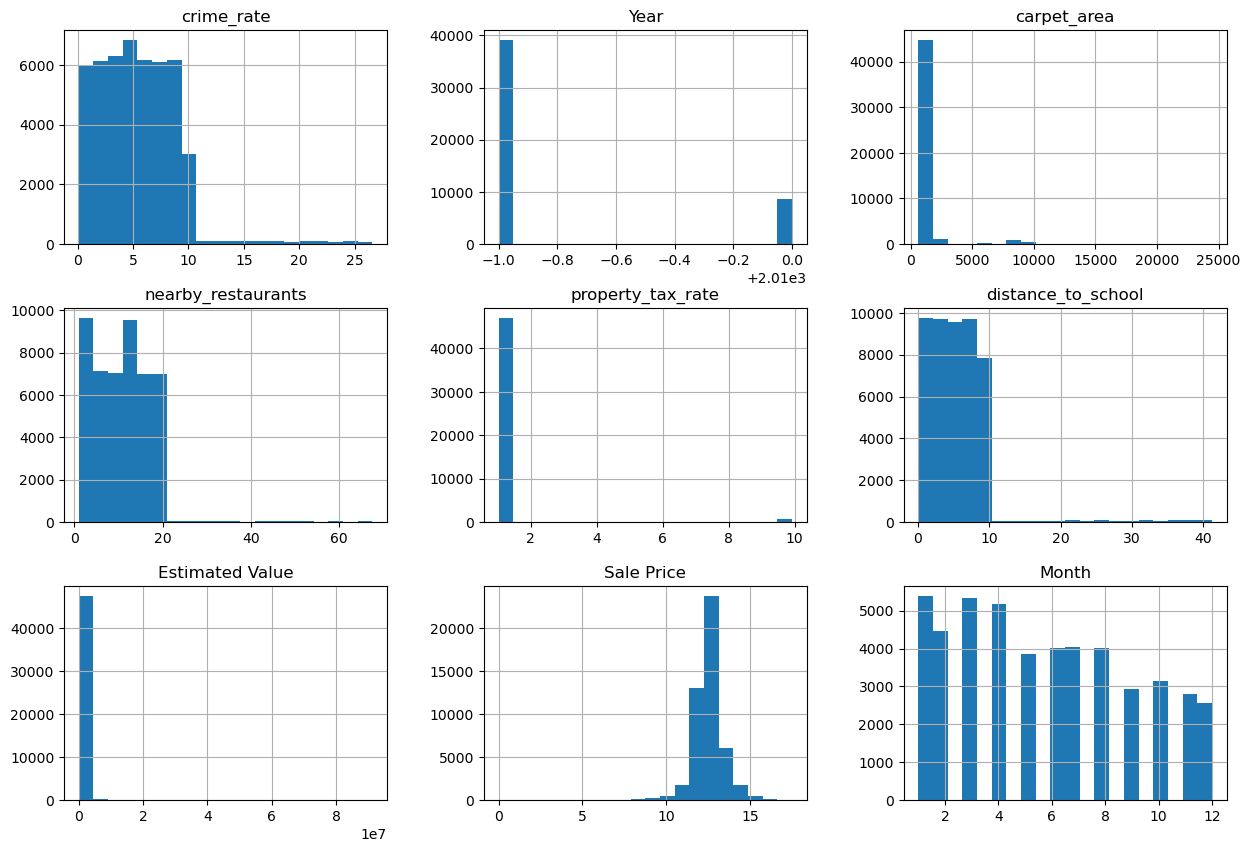

In [35]:
df.hist(bins=20, figsize=(15,10))
plt.show


## DATA PREPROCESSING


In [36]:
##Mapping renovation_level (encoding)
renovation_mapping ={
    'Minor': 1,
    'Basic': 2,
    'Limited': 3,
    'Essential': 4,
    'Partial': 5,
    'Standard': 6,
    'Advanced': 7,
    'Extensive':8,
    'Complete': 9,
    'Premium': 10
}
df['renovation_level']=df['renovation_level'].map(renovation_mapping)



In [37]:
##changing the number of rooms columns to numerical
room_mapping={
    'Two rooms': 2,
    'Three rooms': 3,
    'Four rooms':4,
    'Six rooms': 6,
    'seven rooms':7,
    'Eight rooms':8,
}
df['num_rooms']=df['num_rooms'].map(room_mapping)

In [38]:
property_mean_map =df.groupby('Property')['Sale Price'].mean().to_dict()
print(property_mean_map)

{'Condo': 12.221385523318373, 'Four Family': 12.433248605469778, 'Single Family': 12.657610064328367, 'Three Family': 12.261042508462136, 'Two Family': 12.255218684872695}


In [39]:
##Encoding Property column
#Replace Property column with its target (mean Sale Price) encoding
df['Property']=df['Property'].map(df.groupby('Property')['Sale Price'].mean())

In [40]:
##Encoding amenities_rating
amenities_mapping = {
    'Marginal': 1,
    'Unimpresive': 2,
    'Below Average': 3,
    'Commonplace': 4,
    'Mediocre': 5,
    'satisfactory': 6,
    'Superb': 7,
    'Outstnding': 8,
    'exceptional': 9,
    'Luxurious': 10,
}
df['amenities_rating']= df['amenities_rating'].map(amenities_mapping)

In [41]:
##Encoding public_transport_availability
transport_mapping={
    'Inadequate': 1,
    'sparse': 2,
    'Insufficient': 3,
    'Limited': 4,
    'Patchy': 5,
    'scttered': 6,
    'Accessible': 7,
    'Well-connected': 8,
    'Extensive': 9,
    'Abundant': 10,
}

df['public_transport_availability']= df['public_transport_availability'].map(transport_mapping)
    

In [42]:
##converting Residentiaal
property_mean_map = df.groupby('Residential')['Sale Price'].mean().to_dict()
print(property_mean_map)

{'Condominium': 12.221385523318373, 'Detached House': 12.657610064328367, 'Duplex': 12.255218684872695, 'Fourplex': 12.433248605469778, 'Triplex': 12.261042508462136}


In [43]:
#Target encode the simplified locality column
locality_target_mean = df.groupby('Locality')['Sale Price'].mean()
df['Locality']= df['Locality'].map(locality_target_mean)

In [44]:
df['carpet_area']= df['carpet_area'].astype('float')

In [45]:
df['property_tax_rate']= df['property_tax_rate'].astype('float')

In [46]:
df.head()

,crime_rate,renovation_level,Year,num_rooms,Property,amenities_rating,carpet_area,nearby_restaurants,public_transport_availability,property_tax_rate,distance_to_school,Locality,Residential,Estimated Value,Sale Price,Data,Month
0,2.656826,1,2009,2,12.221386,5.0,760.000000,19.0,NaN,1.025953,6.586707,14.278197,Condominium,711270.0,13.790193,2009-01-02-00:00:00,2
1,5.328727,2,2009,3,12.657610,7.0,7967.337677,17.0,9.0,1.025953,8.224127,12.384812,Detached House,119970.0,12.154253,2009-01-02-00:00:00,2
2,4.037759,2,2009,3,12.657610,NaN,982.000000,1.0,7.0,1.025953,8.019369,13.454116,Detached House,494530.0,13.623139,2009-01-02-00:00:00,2
3,2.085309,8,2009,3,12.657610,7.0,976.000000,5.0,3.0,1.025953,6.175522,12.893187,Detached House,197600.0,13.017003,2009-01-02-00:00:00,2
4,7.240137,1,2009,3,12.657610,NaN,1084.000000,8.0,10.0,1.025953,9.701621,12.042800,Detached House,53330.0,11.156251,2009-01-02-00:00:00,2


In [47]:
#Transforming Estimated Value by Log Transformation
df['Estimated Value'] = np.log(df['Estimated Value'])

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [48]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Sale Price']) #Features
y = df['Sale Price']

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42 )

In [49]:
# Example values for a house (in the order your model expects)
house_data = [
    4.5,     # crime_rate
    6,       # renovation_level
    2009,    # Year
    3,       # num_rooms
    12.11,   # Property (target-encoded)
    8,       # amenities_rating
    1100.0,  # carpet_area
    9.0,     # nearby_restaurants
    7,       # public_transport_availability
    1.45,    # property_tax_rate
    4.2,     # distance_to_school
    11.57,   # Locality (target-encoded)
    1.0,     # Residential
    13.02,   # Estimated Value (log-transformed or drop if not used)
    6        # Month
]

## Exploratory Data Analysis EDA

In [50]:
##First 5 rows in dataset
df.head()

,crime_rate,renovation_level,Year,num_rooms,Property,amenities_rating,carpet_area,nearby_restaurants,public_transport_availability,property_tax_rate,distance_to_school,Locality,Residential,Estimated Value,Sale Price,Data,Month
0,2.656826,1,2009,2,12.221386,5.0,760.000000,19.0,NaN,1.025953,6.586707,14.278197,Condominium,13.474807,13.790193,2009-01-02-00:00:00,2
1,5.328727,2,2009,3,12.657610,7.0,7967.337677,17.0,9.0,1.025953,8.224127,12.384812,Detached House,11.694997,12.154253,2009-01-02-00:00:00,2
2,4.037759,2,2009,3,12.657610,NaN,982.000000,1.0,7.0,1.025953,8.019369,13.454116,Detached House,13.111363,13.623139,2009-01-02-00:00:00,2
3,2.085309,8,2009,3,12.657610,7.0,976.000000,5.0,3.0,1.025953,6.175522,12.893187,Detached House,12.194000,13.017003,2009-01-02-00:00:00,2
4,7.240137,1,2009,3,12.657610,NaN,1084.000000,8.0,10.0,1.025953,9.701621,12.042800,Detached House,10.884254,11.156251,2009-01-02-00:00:00,2


In [51]:
## Checking info about data(Non-Null,Count,Dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47698 entries, 0 to 47697
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   crime_rate                     47698 non-null  float64
 1   renovation_level               47698 non-null  int64  
 2   Year                           47698 non-null  int64  
 3   num_rooms                      47698 non-null  int64  
 4   Property                       47698 non-null  float64
 5   amenities_rating               26148 non-null  float64
 6   carpet_area                    47698 non-null  float64
 7   nearby_restaurants             47698 non-null  float64
 8   public_transport_availability  35660 non-null  float64
 9   property_tax_rate              47698 non-null  float64
 10  distance_to_school             47698 non-null  float64
 11  Locality                       47698 non-null  float64
 12  Residential                    47698 non-null 

In [52]:

df['crime_rate'].value_counts()


crime_rate
5.181464    668
4.278409      2
2.656826      1
9.618844      1
8.003650      1
           ... 
1.026946      1
2.884227      1
0.825315      1
1.892033      1
5.539111      1
Name: count, Length: 47030, dtype: int64

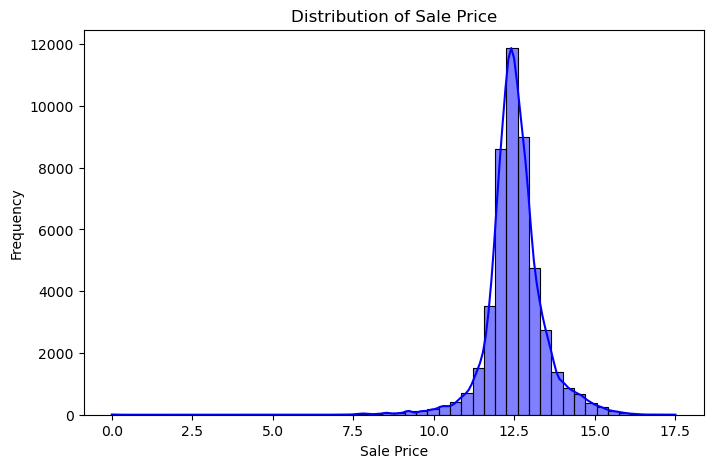

In [53]:
## Distribution of sales price
plt.figure(figsize=(8,5))
sns.histplot(df['Sale Price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

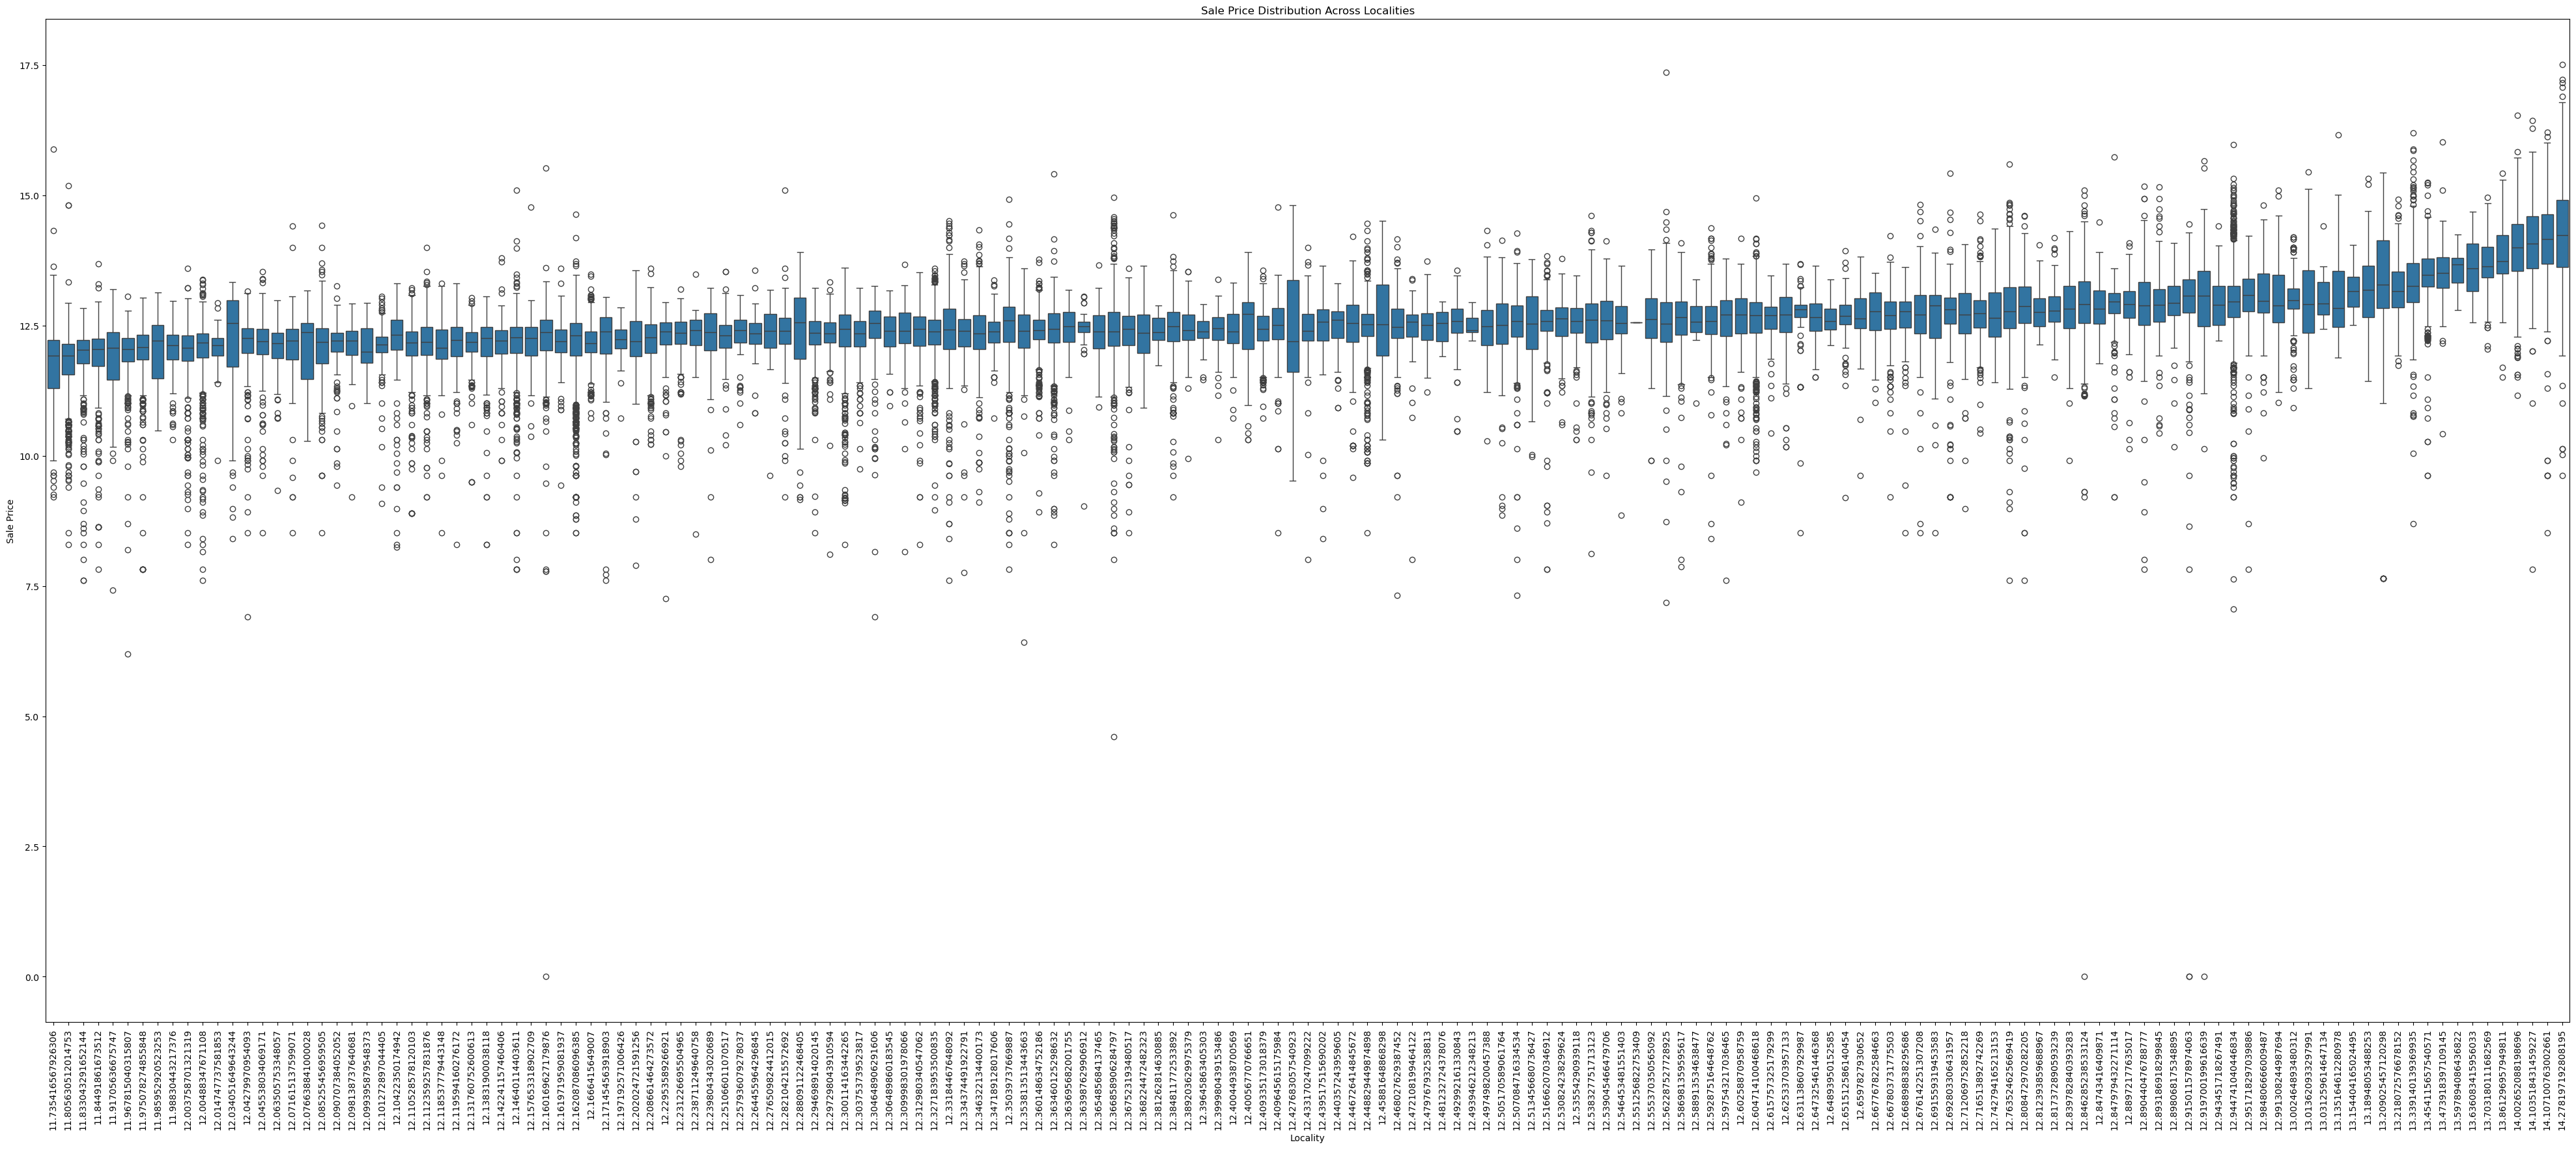

In [54]:
##Boxplot of Sale Price by Locality (Helps to understand how prices vary across different areas.)
plt.figure(figsize=(50,20))
sns.boxplot(x='Locality', y='Sale Price', data=df)
plt.xticks(rotation=90)  # Rotate for better visibility
plt.title("Sale Price Distribution Across Localities")
plt.show()

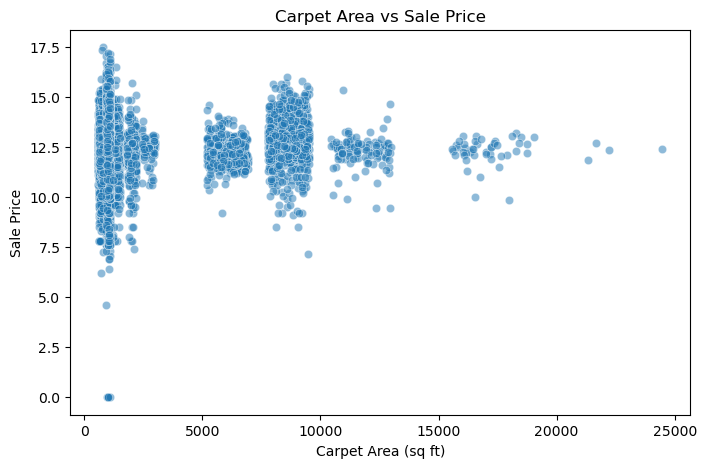

In [55]:
##Scatter Plot of Carpet Area vs Sale Price
##Shows whether larger houses sell for higher prices.
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['carpet_area'], y=df['Sale Price'], alpha=0.5)
plt.title('Carpet Area vs Sale Price')
plt.xlabel('Carpet Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

/var/folders/z_/1fdndl051_37ldt2mr6h3p000000gn/T/ipykernel_74405/691776203.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['num_rooms'], order=df['num_rooms'].value_counts().index, palette="coolwarm")


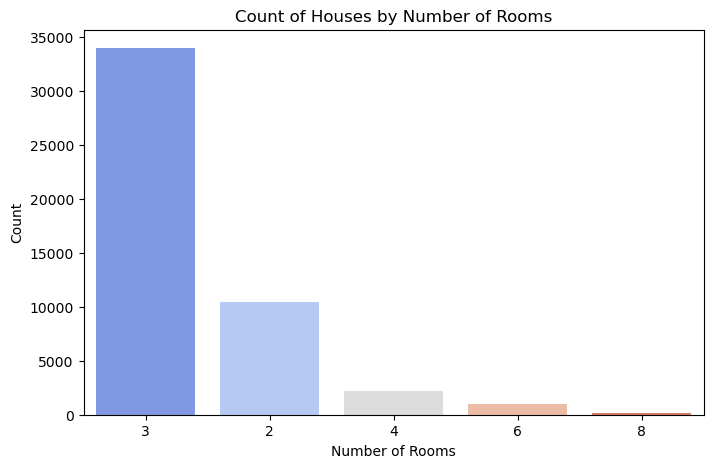

In [56]:
## Count of Houses by Number of Rooms (countplot)
plt.figure(figsize=(8,5))
sns.countplot(x=df['num_rooms'], order=df['num_rooms'].value_counts().index, palette="coolwarm")
plt.title("Count of Houses by Number of Rooms")
plt.xlabel("Number of Rooms")
plt.ylabel("Count")
plt.show()

/var/folders/z_/1fdndl051_37ldt2mr6h3p000000gn/T/ipykernel_74405/956558442.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='renovation_level', y='Sale Price', data=df, palette="coolwarm")


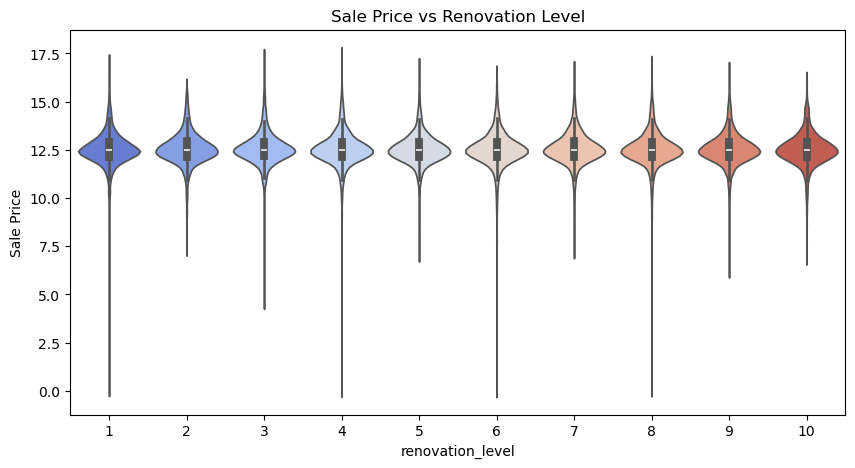

In [57]:

##Violin Plot of Sale Price vs Renovation Level (helps to see renovation affects sales price)
plt.figure(figsize=(10,5))
sns.violinplot(x='renovation_level', y='Sale Price', data=df, palette="coolwarm")
plt.title("Sale Price vs Renovation Level")
plt.show()

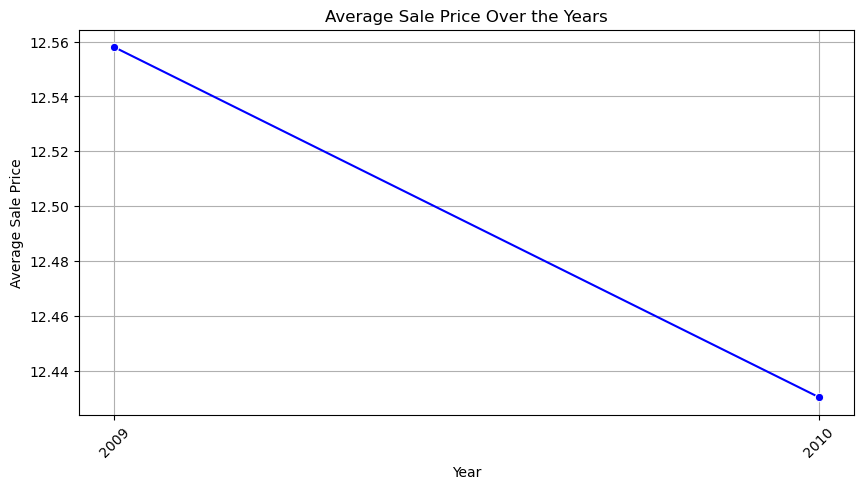

In [58]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['Year'], y=df['Sale Price'], estimator='mean', errorbar=None, marker='o', color='blue')
plt.xticks(ticks=df['Year'].unique(), labels=df['Year'].unique(), rotation=45)  # Ensure proper labels
plt.title("Average Sale Price Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Sale Price")
plt.grid()
plt.show()

/var/folders/z_/1fdndl051_37ldt2mr6h3p000000gn/T/ipykernel_74405/2908841578.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Year'], y=df['Sale Price'], palette="coolwarm")


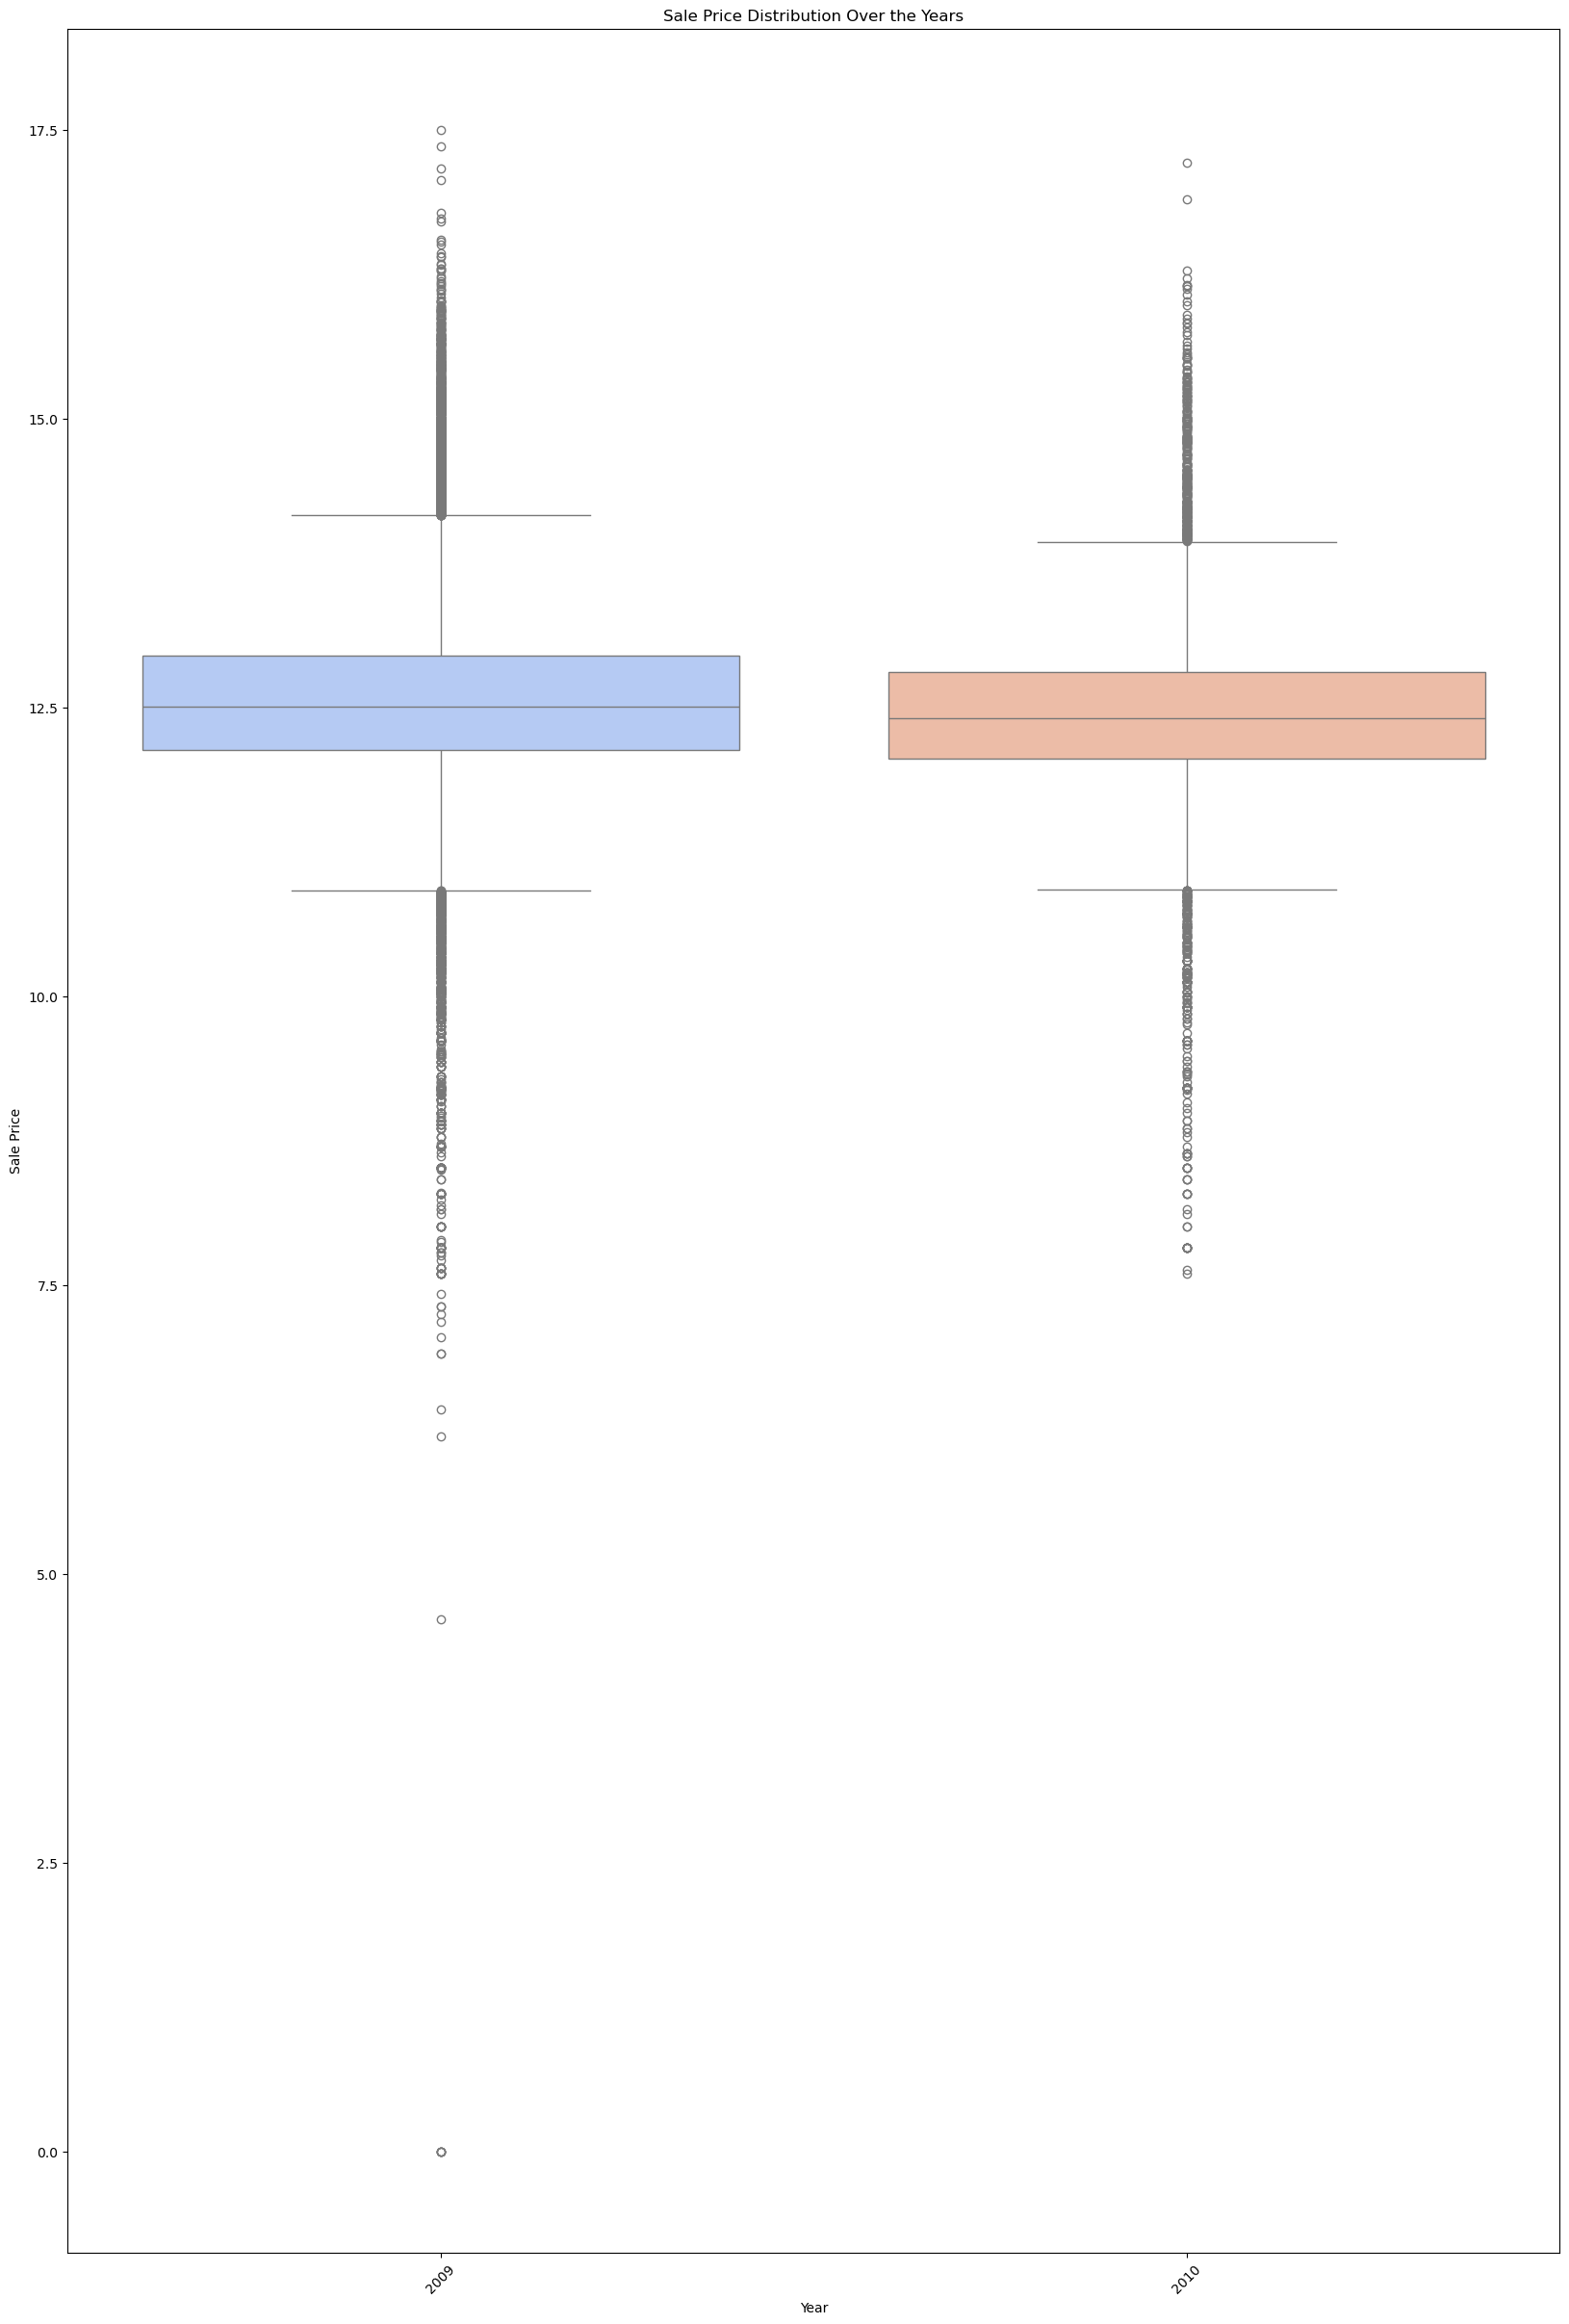

In [59]:
#Shows how much prices fluctuate every year.
plt.figure(figsize=(20,30))
sns.boxplot(x=df['Year'], y=df['Sale Price'], palette="coolwarm")
plt.title("Sale Price Distribution Over the Years")
plt.xlabel("Year")
plt.ylabel("Sale Price")
plt.xticks(rotation=45)
plt.show()

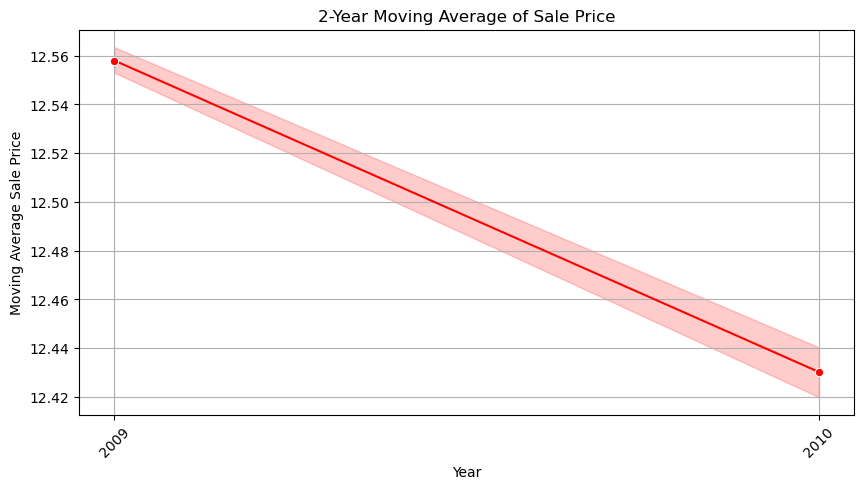

In [60]:
df_sorted = df.sort_values('Year')
df_sorted['Moving_Avg_Sale_Price'] = df_sorted['Sale Price'].rolling(window=3, min_periods=1).mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=df_sorted['Year'], y=df_sorted['Moving_Avg_Sale_Price'], color='red', marker='o')
plt.xticks(ticks=df['Year'].unique(), labels=df['Year'].unique(), rotation=45)  # Ensure proper labels
plt.title("2-Year Moving Average of Sale Price")
plt.xlabel("Year")
plt.ylabel("Moving Average Sale Price")
plt.grid()
plt.show()

/var/folders/z_/1fdndl051_37ldt2mr6h3p000000gn/T/ipykernel_74405/2543899701.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_localities.index, y=top_localities.values, palette="coolwarm")


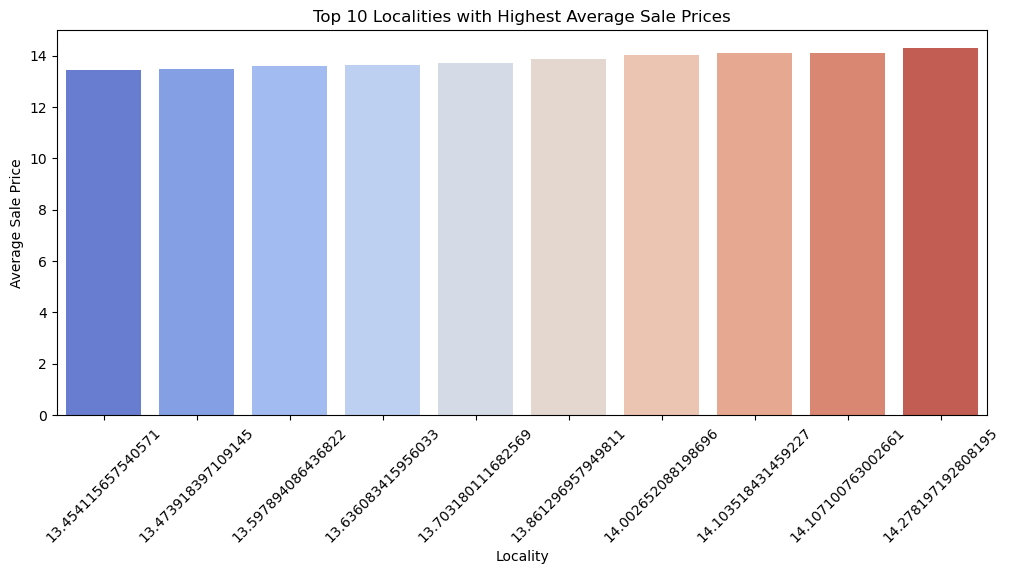

In [61]:
top_localities = df.groupby('Locality')['Sale Price'].mean().nlargest(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_localities.index, y=top_localities.values, palette="coolwarm")
plt.title("Top 10 Localities with Highest Average Sale Prices")
plt.xlabel("Locality")
plt.ylabel("Average Sale Price")
plt.xticks(rotation=45)
plt.show()

/var/folders/z_/1fdndl051_37ldt2mr6h3p000000gn/T/ipykernel_74405/1376888490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['renovation_level'], y=df['Sale Price'], palette="viridis")


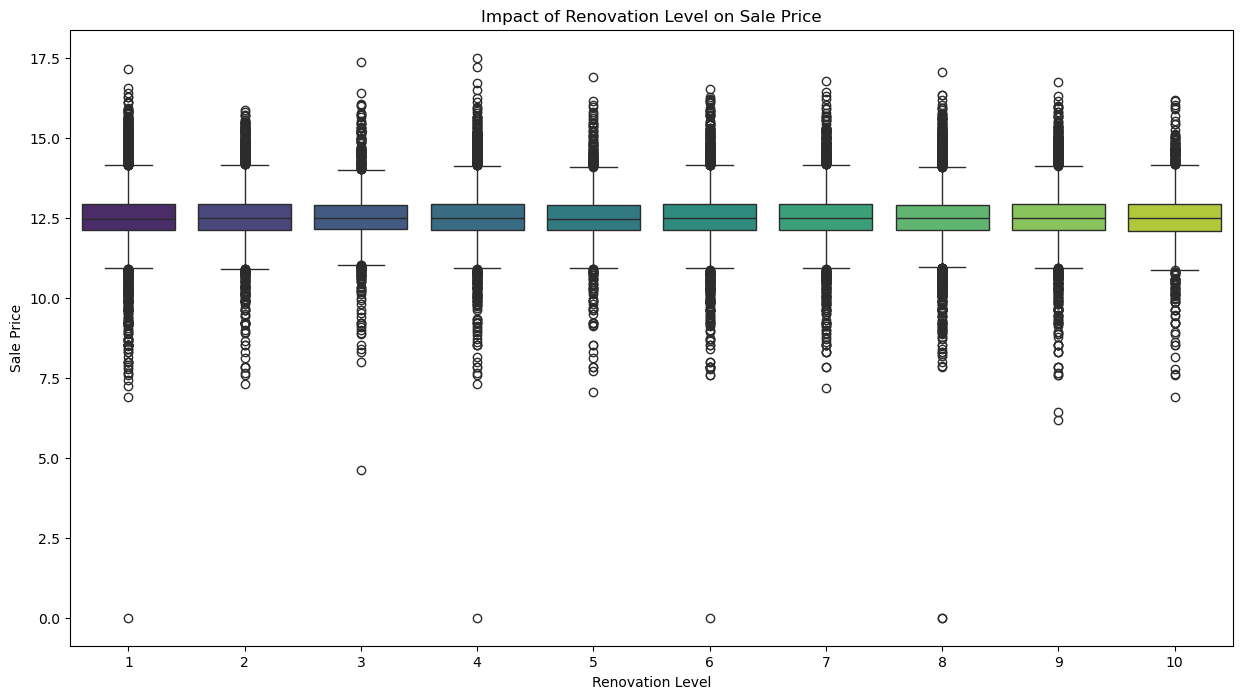

In [62]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['renovation_level'], y=df['Sale Price'], palette="viridis")
plt.title("Impact of Renovation Level on Sale Price")
plt.xlabel("Renovation Level")
plt.ylabel("Sale Price")
plt.show()

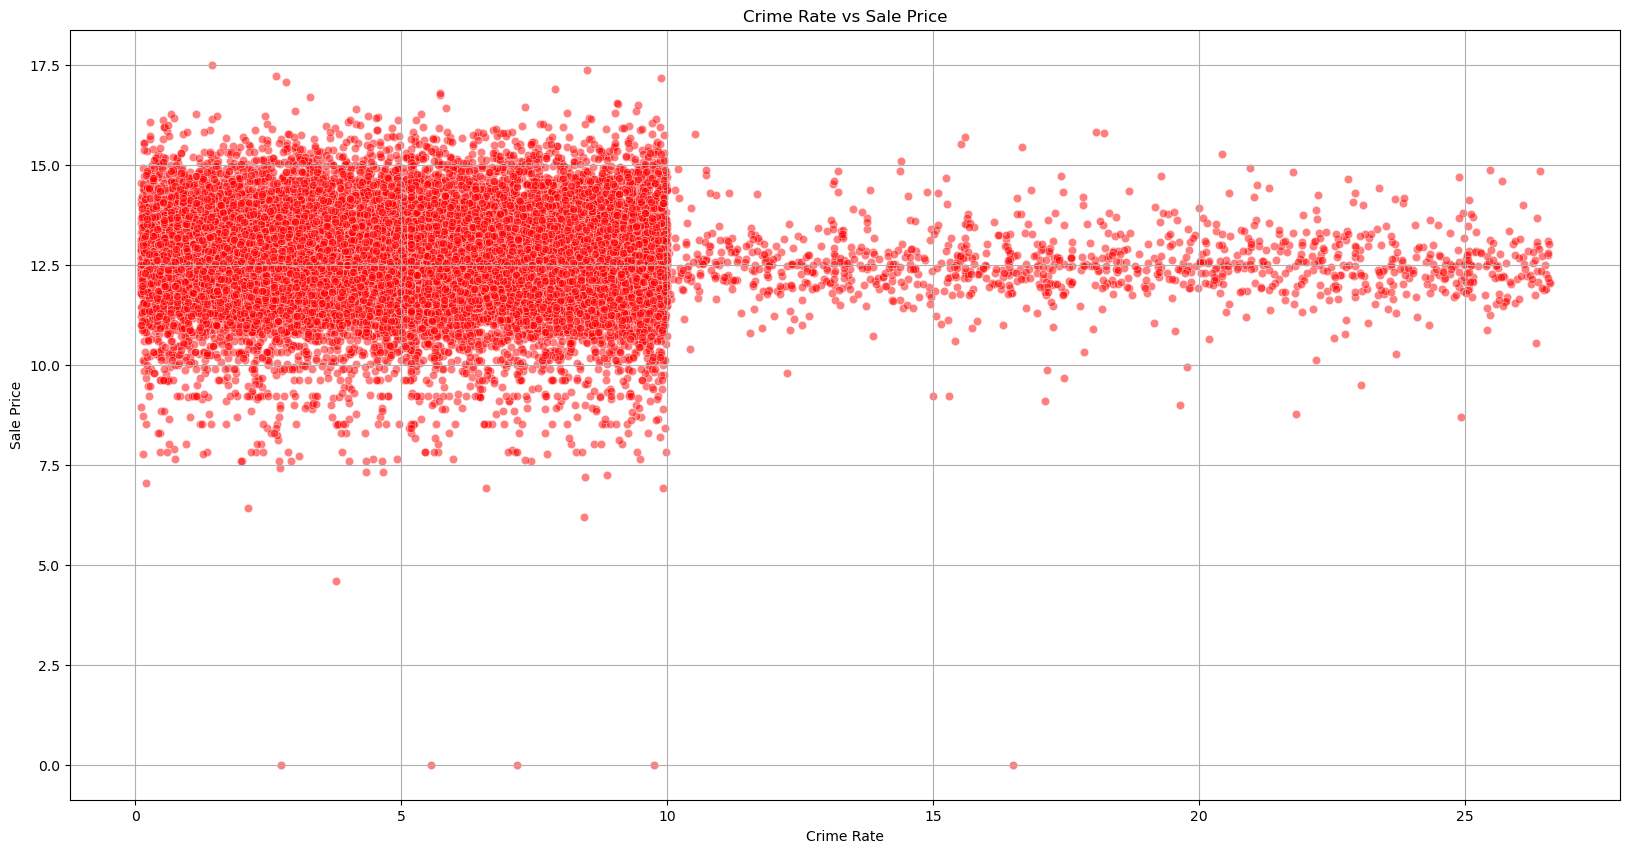

In [63]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['crime_rate'], y=df['Sale Price'], alpha=0.5, color="red")
plt.title("Crime Rate vs Sale Price")
plt.xlabel("Crime Rate")
plt.ylabel("Sale Price")
plt.grid()
plt.show()

/var/folders/z_/1fdndl051_37ldt2mr6h3p000000gn/T/ipykernel_74405/532584347.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Property'], y=df['Sale Price'], estimator=np.mean, ci=None, palette="magma")
/var/folders/z_/1fdndl051_37ldt2mr6h3p000000gn/T/ipykernel_74405/532584347.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Property'], y=df['Sale Price'], estimator=np.mean, ci=None, palette="magma")


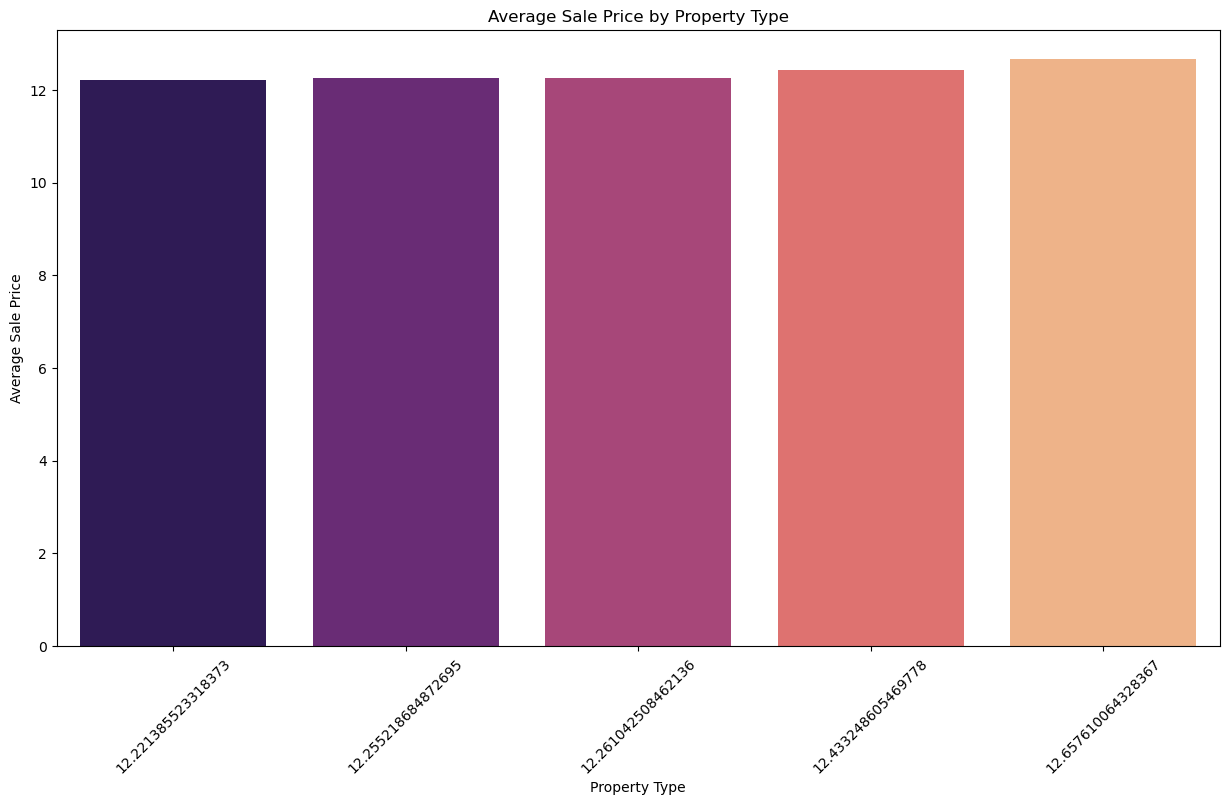

In [64]:
plt.figure(figsize=(15,8))
sns.barplot(x=df['Property'], y=df['Sale Price'], estimator=np.mean, ci=None, palette="magma")
plt.title("Average Sale Price by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Average Sale Price")
plt.xticks(rotation=45)
plt.show()

/var/folders/z_/1fdndl051_37ldt2mr6h3p000000gn/T/ipykernel_74405/3786499898.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Sale Price', data=df, estimator='mean', marker='o', ci=None, color='blue')


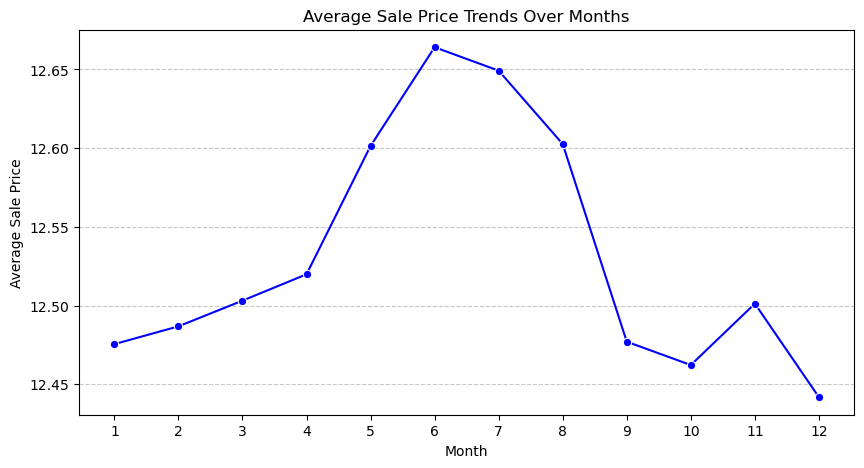

In [65]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Month', y='Sale Price', data=df, estimator='mean', marker='o', ci=None, color='blue')
plt.title("Average Sale Price Trends Over Months")
plt.xlabel("Month")
plt.ylabel("Average Sale Price")
plt.xticks(range(1, 13))  # Ensure months are correctly labeled
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

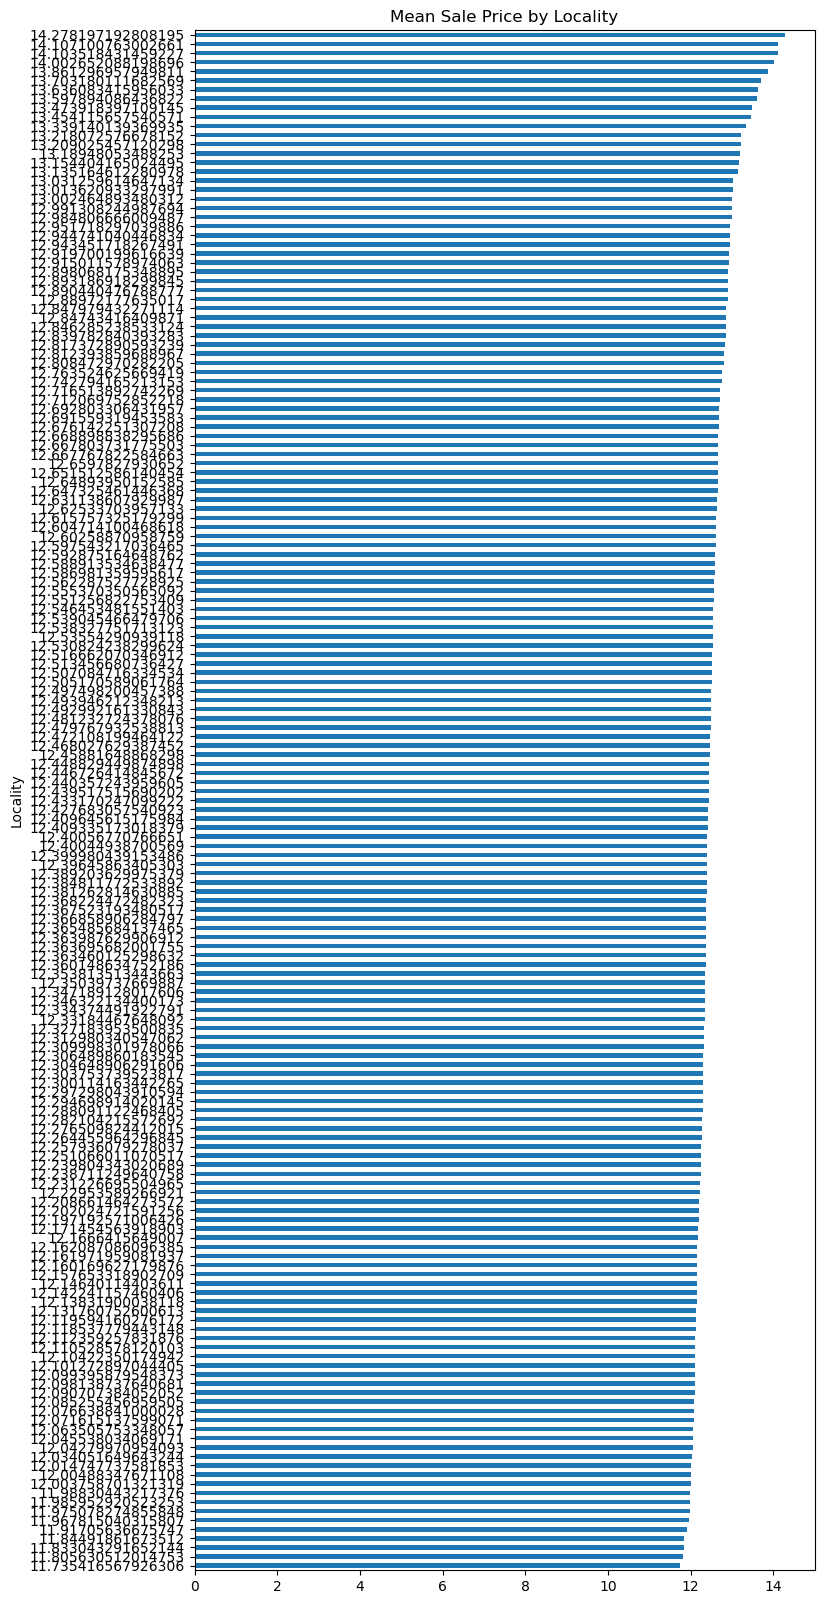

In [66]:
# Check average sale price by locality
df.groupby('Locality')['Sale Price'].mean().sort_values().plot(kind='barh', figsize=(8,20 ))
plt.title("Mean Sale Price by Locality")
plt.show()

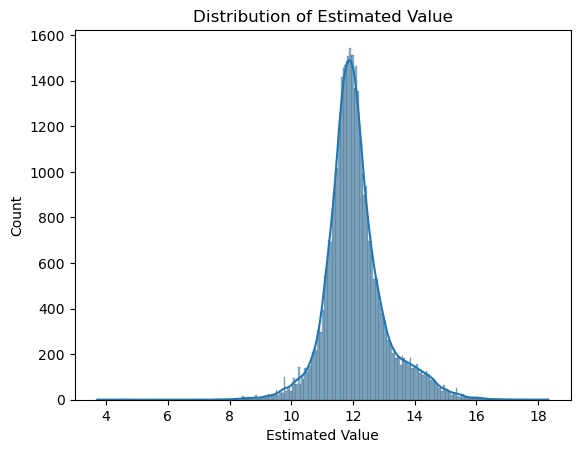

In [67]:
sns.histplot(df['Estimated Value'], kde=True)
plt.title('Distribution of Estimated Value')
plt.show()

## MODEL TRAINING